In [1]:
import numpy as np

In [3]:
c = np.array([[False, True, False],
              [True, False, False],
              [False, False, True]])
np.where(c == True)

(array([0, 1, 2]), array([1, 0, 2]))

In [4]:
a = np.array([1,1,2,2,3])
b = np.array([0,2,2,1,1])

In [5]:
a == b

array([False, False,  True, False, False])

In [12]:
import torch
from dataset import Planetoid
import os.path as osp
import torch_geometric.transforms as T
import numpy as np
name = 'Cora'
path = osp.join('datasets', name)
split = 'imbalance'
imb_ratio = 10
fix_minority = True

dataset = Planetoid(path, name, split=split, imb_ratio= imb_ratio, fix_minority= fix_minority, transform = T.NormalizeFeatures())
data = dataset[0]
imb_cls_num_list = dataset.imb_cls_num_list
# def get_idx_info(data, n_cls):
#     train_mask = data.train_mask
#     labels = data.y
#     index_list = torch.arange(labels.shape[0])  # all node indices
#     train_nodes_per_cls = []
#     num_train_nodes_per_cls     = []
#     for i in range(n_cls):
#         cls_indices = index_list[((labels == i) & train_mask)] # all nodes idx with label i
#         num_nodes_i = (labels[train_mask] == i).sum()
#         train_nodes_per_cls.append(cls_indices)
#         num_train_nodes_per_cls.append(int(num_nodes_i.item()))
#     return train_nodes_per_cls, num_train_nodes_per_cls


def balance_embedding(data, n_cls):
    x, edge_index = data.x, data.edge_index
    imb_train_mask = data.imb_train_mask
    max_num = max(imb_cls_num_list)
    imb_cls_num = n_cls // 2

    upsamples = np.array(max_num - np.array(imb_cls_num_list)) # [ 0  0  0  0 18 18 18]
    print(upsamples)




In [7]:
imb_cls_num_list

[20, 20, 20, 20, 2, 2, 2]

In [14]:
a = torch.tensor([[20, 20, 20, 20, 2, 2, 2],
                  [1,  2,  3,  4,  5,  6, 7]], dtype=torch.float)


In [15]:
import torch.nn.functional as F

F.normalize(a)

tensor([[0.4981, 0.4981, 0.4981, 0.4981, 0.0498, 0.0498, 0.0498],
        [0.0845, 0.1690, 0.2535, 0.3381, 0.4226, 0.5071, 0.5916]])

In [23]:
a / np.linalg.norm(a, axis=1, ord=2, keepdims=True)

tensor([[0.4981, 0.4981, 0.4981, 0.4981, 0.0498, 0.0498, 0.0498],
        [0.0845, 0.1690, 0.2535, 0.3381, 0.4226, 0.5071, 0.5916]])

In [24]:
a

tensor([[20., 20., 20., 20.,  2.,  2.,  2.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.]])

In [25]:
a@ a.t()

tensor([[1612.,  236.],
        [ 236.,  140.]])

In [28]:
b = np.array([[1,2], [3,4]])
b @ b.transpose()

array([[ 5, 11],
       [11, 25]])

In [13]:
A = np.array([[0.1, 0.3, 0.2, 0.7, 0.4], 
              [0.7, 0.5, 0.6, 0.5, 0.3],
              [0.3, 0.2, 1.1, 0.1, 1.3],
              [0.5, 0.3, 0.2, 0.7, 0.6],
              [1.0, 2.2, 0.3, 0.6, 0.2]])

np.fill_diagonal(A, 0)

In [14]:
A

array([[0. , 0.3, 0.2, 0.7, 0.4],
       [0.7, 0. , 0.6, 0.5, 0.3],
       [0.3, 0.2, 0. , 0.1, 1.3],
       [0.5, 0.3, 0.2, 0. , 0.6],
       [1. , 2.2, 0.3, 0.6, 0. ]])

In [15]:
B = np.array([1,1,0,2,0])

In [16]:
from torch_scatter import scatter_mean
scatter_mean(torch.from_numpy(A), torch.from_numpy(B), dim = 0)

tensor([[0.6500, 1.2000, 0.1500, 0.3500, 0.6500],
        [0.3500, 0.1500, 0.4000, 0.6000, 0.3500],
        [0.5000, 0.3000, 0.2000, 0.0000, 0.6000]], dtype=torch.float64)

In [19]:
torch.LongTensor(torch.nonzero(data.imb_train_mask, as_tuple=True)[0])

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  26,  27,  28,  30,
         32,  34,  35,  36,  37,  40,  44,  45,  46,  48,  51,  52,  53,  54,
         57,  58,  59,  60,  61,  62,  64,  65,  68,  71,  72,  73,  74,  79,
         80,  81,  83,  85,  88,  90,  94,  95,  98, 100, 101, 102, 103, 104,
        105, 109, 110, 111, 112, 121, 124, 126, 131, 133, 134, 135, 136, 137,
        138, 139])

In [22]:
sorted_indices = np.argsort(-A, axis=1)

In [2]:
numbers_list = [4, 4, 5, 6, 6, 5,5]

# Counting the frequency of each number using a dictionary
frequency_dict = {}
for number in numbers_list:
    frequency_dict[number] = frequency_dict.get(number, 0) + 1

frequency_dict

{4: 2, 5: 3, 6: 2}

In [5]:
frequency_dict.keys()

dict_keys([4, 5, 6])

In [8]:
2 in frequency_dict.keys()

False

In [34]:
np.unique(np.array(new_train_nodes))

array([0, 1, 2, 3, 4])

In [12]:
import numpy as np
a = {4: 9, 5:9, 6:9}
b = np.array([4,4,5,6,6,5])

result = np.array([a[item] for item in b])

In [13]:
result

array([9, 9, 9, 9, 9, 9])

In [40]:
c = np.array([31, 97, 65])

In [41]:
data.imb_train_mask[c] = True

In [43]:
data.imb_train_mask.sum()

tensor(88)

In [44]:
data.imb_train_mask.sum()

tensor(88)

In [1]:
7//2

3

In [14]:
a = np.array([[3,2,1], [5,6,1],[9,2,10]])

In [15]:
sorted_indices = np.argsort(-a, axis=1)

In [16]:
sorted_indices

array([[0, 1, 2],
       [1, 0, 2],
       [2, 0, 1]])

In [ ]:
import torch

a = [torch.tensor([1,2,3]), torch.tensor([4,5,6]), torch.tensor([7,8,9])]

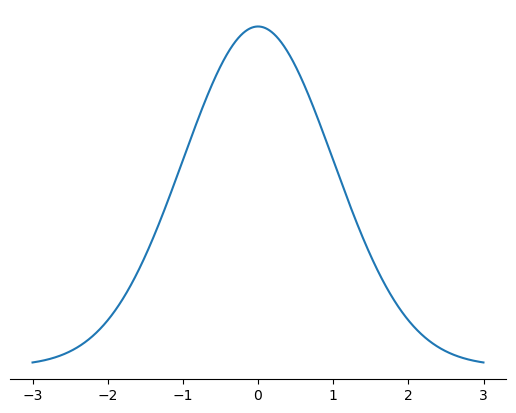

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and standard deviation
mu, sigma = 0, 1

# Generating a range of values from -3 to 3 with 0.001 step
x = np.arange(-3, 3, 0.001)

# Calculating the normal distribution y values
y = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Creating the plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Removing the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_visible(False)
# Adding titles and labels
# plt.title('Normal Distribution')
# plt.xlabel('Values')
# plt.ylabel('Frequency')

# Showing the grid
# plt.grid(True)

# Displaying the plot
plt.show()